<a href="https://colab.research.google.com/github/tsvoronos/API202-students/blob/main/section-KP/section2-KP-answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## API-202M ABC SECTION #2
###### TF: Kelsey Pukelis

**I - INSTRUCTIONS**  

1. **Create a copy of this Jupyter notebook in your own drive by clicking `Copy to Drive` in the menubar (this is explained below in more detail below) - *if you do not do this your work will not be saved!***
    1. Remember to save your work frequently by pressing `command-S` or clicking `File > Save` in the menubar.
    1. We recommend completing this in Google Chrome.

## Load `R` libraries and data

**Please refer this [R Cheat Sheet](https://bit.ly/HKS-R) which includes the commands you learned last semester in addition to a number of additional ones.**

The code cell below imports the R tidyverse. Make sure to run it before starting the problem set!

*Note: Click the "play" button that appears when you hover over a cell to run it. The first time you do this you may receive an alert that this notebook was not authored by Google. If so, click "Run anyway" to proceed.*

In [ ]:
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.3.0      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# PART I: High School Student Exercise and Grades

The purpose of this exercise is to help you understand multiple regression and omitted variable bias.

The dataset for this question is an extract of data from [a survey of high school students on health behaviors](https://www.cdc.gov/healthyyouth/data/yrbs/data.htm). The variables in this dataset are:

*   `age`: age in years 
*   `exercise`: Number of days exercised during the past 7 days
*   `grades`: reported grades during the last 12 months, where 5 = "Mostly A's" ... 1 = "Mostly F's"
*   `sleep`: "On an average school night, how many hours of sleep do you get?"

Notes about pre-processing just to be aware of:

*   The age variable treats students as age 12 or younger as age 12.
*   The age variable treats students as age 18 or older as age 18.
*   The sleep variable treats less than 4 hours as 4 hours. 
*   The sleep variable treats more than 10 hours as 10 hours. 
*   Students who report their grades are "None of these grades" or "Not sure" are not included in this dataset.
*   I only include students whose data is not missing for all four variables.

In [ ]:
students <- read.csv('https://raw.githubusercontent.com/tsvoronos/API202-students/6c2c5ac7433e47e2d31bee81999da063f221e3b7/data/student_health.csv')
head(students)

,age,sleep,grades,exercise
,<int>,<int>,<int>,<int>
1,16,7,4,4
2,15,7,4,5
3,15,8,4,0
4,15,7,3,0
5,16,5,5,1
6,15,6,4,7


**1. Let's start with plotting a histogram for the `exercise` variable.**

**HINT: the code for a histogram 
is `ggplot(dataset, aes(x = var)) + geom_histogram()`
Where dataset is the name of the dataset and var is the variable of interest.**

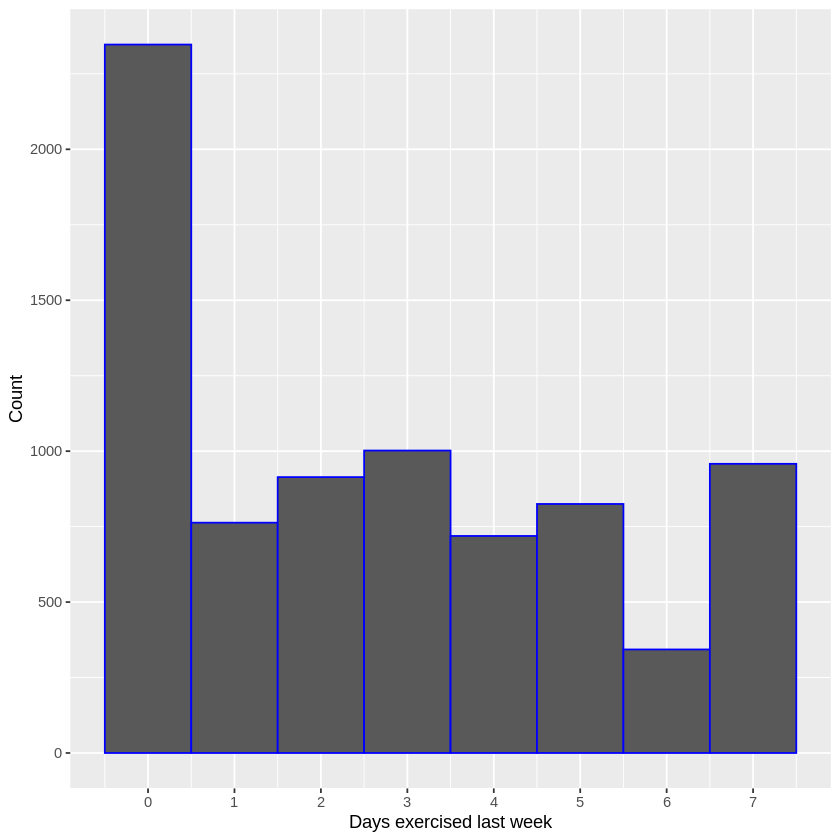

In [ ]:
# Your code here

# START
ggplot(students, aes(x = exercise)) + 
geom_histogram(binwidth = 1,color = "blue") +
scale_x_continuous(breaks = 0:7) +
labs(x = "Days exercised last week", y = "Count")
#END


Your Answer Here 

#### START 
A takeaway is that many students didn't exercise any days in the previous week. The rest of the students are spread approximately uniformly across the other numbers (1 through 7 days a week). 

#### END 

**Bonus: Plot a histogram for student grades. Label the values appropriately.**

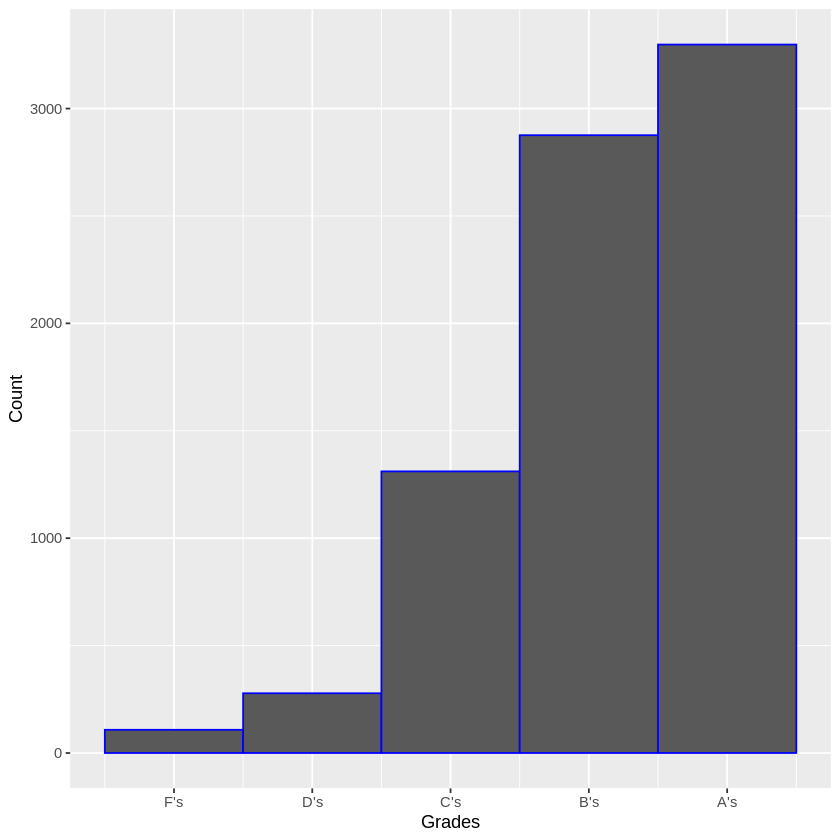

In [ ]:
# Your code here

# START
ggplot(students, aes(x = grades)) + 
geom_histogram(binwidth = 1,color = "blue") +
scale_x_continuous(breaks = 1:5, labels = c("F's","D's","C's","B's","A's")) +
labs(x = "Grades", y = "Count")
#END

Your Answer Here 

#### START 

A few things we discussed that are a little strange about this variable:

*   We are treating the difference between an A and a B the same as the difference between an D and an F, even though that may not hold in reality. This is a limitation of how we are treating this measure in our data. 
*   This variable reflects grades roughly across all classes. A better measure of student performance would be an *average* of a student's grades across all classes (e.g. GPA). 
*   This variable is self-reported, which is less preferred than grades from administrative school records since students could lie to surveyers about their grades. 

#### END 


**2. Using a regression, test the null hypothesis that exercise is not associated with student grades. Discuss the magnitude and statistical significance of your estimate.** 

In [ ]:
# Your code here
# START
reg1 <- lm(grades ~ exercise, data = students)

summary(reg1)

#END


Call:
lm(formula = grades ~ exercise, data = students)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1853 -0.1853 -0.1124  0.8564  0.8876 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 4.112357   0.015359 267.750   <2e-16 ***
exercise    0.010422   0.004208   2.477   0.0133 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9111 on 7869 degrees of freedom
Multiple R-squared:  0.0007789,	Adjusted R-squared:  0.000652 
F-statistic: 6.134 on 1 and 7869 DF,  p-value: 0.01328


Your Answer Here 

#### START 

An increase of one day of exercise per week is associated with an increase of 1.04 percent of a letter grade, on average. This coefficient is statistically significant at the 0.05 level (t = 2.477 and p-value = 0.0133). However, the magnitude of the coefficient is practically small; moving 1.04 percent of a letter grade is not a very meaningful increase in student performance. Even for exercising 7 more days a week, the predicted increase would be only 7.28 percent of a letter grade. 

#### END 



**4. Run a regression of student grades on the `exercise` and `sleep` variables. Interpret each coefficient of the regression, commenting on both magnitude and statistical significance.**

In [ ]:
# Your code here
# START
reg2 <- lm(grades ~ exercise + sleep, data = students)

summary(reg2)

#END


Call:
lm(formula = grades ~ exercise + sleep, data = students)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5492 -0.3225 -0.0088  0.7961  1.1362 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3.431464   0.050094  68.500   <2e-16 ***
exercise    0.005266   0.004171   1.263    0.207    
sleep       0.108088   0.007579  14.262   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8996 on 7868 degrees of freedom
Multiple R-squared:  0.02596,	Adjusted R-squared:  0.02571 
F-statistic: 104.8 on 2 and 7868 DF,  p-value: < 2.2e-16


Your answer here

#### START 
An increase of one day of exercise per week is now associated with an increase of 0.53 percent of a letter grade, on average, holding constant hours of sleep. This coefficient is no longer statistically significant at the 0.05 level (t = 1.263 and p-value = 0.207), and the magnitude of the coefficient is now even smaller and less practically meaningful.

An increase in one hour of sleep on a typical school night is associated with an increase of 10.8 percent of a letter grade, on average, holding constant days of exercise per week. This coefficient is very statistically significant (t = 14.262 and p-value = 0.000). The magnitude of this coefficient is also quite practically meaningful. If the relationship were causal (a big "if"), this would suggest encouraging students to get more sleep could improve their grades marginally. 

Overall, we should conclude that sleep matters much more for student performance than exercise.
#### END 


**5. Why do you think the slope coefficient on `exercise` changes as it does between the two regressions? Provide an explanation to a policy maker interested in your results.**

Your answer here

#### START 

When we add the sleep variable, the estimated relationship between exercise and student grades becomes smaller in magnitude. This is because the type of students who sleep more are also the type of students who exercise more and who get better grades, and sleep matters more for explaining student performance than exercise. 

#### END 

**6. If we fail to include hours of sleep in the regression, then the coefficient on exercise is an ________________ of the true relationship between exercise and student grades.**

Check one:
- [ ] Overstatement
- [ ] Understatement

Your explanation here




#### START 

Overstatement. 

Here is a thorough discussion, which you can read to check your understanding. (An adequate response could be much shorter than this.)

Recall: 

$$
bias = \hat{\alpha}_1 - \hat{\beta}_1 = \hat{\beta}_2 * \hat{\gamma}_1
$$
Sleep is positively correlated with both exercise (so $\hat{\gamma}_1 > 0$) and grades (so $\hat{\beta}_2 > 0$).  This means that the bias term is greater than zero ($bias = \hat{\beta}_2 * \hat{\gamma}_1 > 0$). Remember that bias is equal to the difference in the coefficent on exercise in the shorter regression, minus the coefficient on exercise in the longer regression: $bias = \hat{\alpha}_1 - \hat{\beta}_1 > 0$. Rearranging this, we get $\hat{\alpha}_1 > \hat{\beta}_1$, i.e. the (positive) coefficient on exercise is smaller in magnitude in the second regression compared to the first. 

*Extra discussion.* One student asked: how do we know that exercise and sleep are positively correlated? Do we just speculate about the relationship, or is this something that we can see in the data? 

Since we have the data on the two variables in our dataset, we can test this by running a bivariate regression. (See the code below.) Indeed, we find that sleep and exercise are positively correlated because the slope coefficient in the bivariate regression is positive. 

However, we often have discussions about omitted variable bias for variables that we don't actually have data on. In this case, all we can do is use contextual knowledge to speculate about the sign (+ or -) of the relationship between variables to determine the sign of the bias. 

#### END 

In [ ]:
# Your code here (optional)

# START
reg3 <- lm(sleep ~ exercise, data = students)
summary(reg3)
# END 


Call:
lm(formula = sleep ~ exercise, data = students)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.6334 -0.6334 -0.2994  0.7006  3.7006 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.29944    0.02256  279.27  < 2e-16 ***
exercise     0.04771    0.00618    7.72 1.31e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.338 on 7869 degrees of freedom
Multiple R-squared:  0.007516,	Adjusted R-squared:  0.00739 
F-statistic: 59.59 on 1 and 7869 DF,  p-value: 1.311e-14


**Bonus: See what happens if you add in age to the right hand side of the regressions. Comment on what happens to the regression coefficients.**

In [ ]:
# Your code here

# START 

reg4 <- lm(grades ~ exercise + sleep + age, data = students)

summary(reg4)

# END


Call:
lm(formula = grades ~ exercise + sleep + age, data = students)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5706 -0.3235 -0.0223  0.7967  1.1589 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.658526   0.149018  24.551   <2e-16 ***
exercise     0.005085   0.004172   1.219    0.223    
sleep        0.106626   0.007632  13.971   <2e-16 ***
age         -0.013552   0.008377  -1.618    0.106    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8995 on 7867 degrees of freedom
Multiple R-squared:  0.02628,	Adjusted R-squared:  0.02591 
F-statistic: 70.78 on 3 and 7867 DF,  p-value: < 2.2e-16


You answer here

#### START 

An increase of age of one year is associated with a decrease of 1.35 percent of a letter grade. The coefficient is neither significant statistically or meaningfully. We cannot reject the null hypothesis that there is no relationship between student age and grades.

Relative to the second regression, the coefficients on exercise and sleep hardly changed. This makes since because age is not correlated with student grades ($\hat{\beta}_3 \approx 0$), so omitting age was NOT biasing our estimate of the effect of exercise or sleep on grades. 

#### END 

**7. The outputs from the regressions are usually presented as well-formatted tables. In this question, you will learn how to nicely format a table with the results from multiple regressions.**

**First, run the script below installing the package modelsummary (this may take a minute or so to install).**

In [ ]:
check_installed <- require(modelsummary)
if(check_installed==F){
  install.packages("modelsummary")
  require(modelsummary)
}

Loading required package: modelsummary

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘modelsummary’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘webshot’, ‘bayestestR’, ‘datawizard’, ‘checkmate’, ‘insight’, ‘kableExtra’, ‘parameters’, ‘performance’, ‘tables’


Loading required package: modelsummary



**8. Next, include the results of the regressions you run in this exercise in a nicely formatted table using the existing code below to get started**

In the code snippet below, `fit1`, `fit2`, and `fit3` is the regression outputs you saved in previous code, `Name of Outcome Variable` is what you would like to show up on the top of each column, and `var1` and `var2` are the name of two independent variables included in the regression (e.g., exercise). Note that you can and should include all the variables that you used in the models you ran in the `coef_map` line.
```
  modelsummary(list("Name Outcome Variable" = fit1,"Name Outcome Variable" = fit2, "Name Outcome Variable" = fit3),
  stars=T,
  coef_map = c("(Intercept)" = "Constant","var1" = "Name of var1", "var2" = "Name of var2"),
 title = "Add Here the Title of the Table",
  gof_omit = 'IC|Log',
  output="jupyter")

  ```

In [ ]:
# Your answer here

# START

modelsummary(list("Student grades" = reg1,"Student grades" = reg2, "Student grades" = reg4),
  stars=T,
  coef_map = c("exercise" = "Days exercised last week","sleep" = "Typical hours slept","age" = "Age","(Intercept)" = "Constant"),
  title = "Relationship between Student Grades and Exercise",
  gof_omit = 'IC|Log',
  output="jupyter")

# END

,Student grades,Student grades,Student grades
Days exercised last week,0.010*,0.005,0.005
,(0.004),(0.004),(0.004)
Typical hours slept,,0.108***,0.107***
,,(0.008),(0.008)
Age,,,−0.014
,,,(0.008)
Constant,4.112***,3.431***,3.659***
,(0.015),(0.050),(0.149)
Num.Obs.,7871,7871,7871
R2,0.001,0.026,0.026


**11. Now compare the R-squared in the different columns of the Table you created in the previous Question. What do you observe?**

Your explanation here

#### START 
The R-squared increases between columns (1) and (2), as sleep is added to the regression. The R-squared hardly increases between columns (2) and (3) because age does not help explain variation in student grades. This makes since, since we don't really expect there to be a strong relationship between student age and grades. 

In column (3): the three variables explain 2.6 percent of the variation in student grades. This value of R-squared is quite low, even for data in the social sciences. 

#### END 


# PART II: College quality and future earnings



See the handout posted on Canvas.